<h2 style="color:darkred;font-size:30px">Projet 4 : Segmentez des clients d'un site e-commerce</h2>

<img src="images\olist.png" style="width: 250px;"/>

<h2 style="color:darkred;font-size:30px">Notebook 2 : Modélisation (DBSCAN)</h2>

---
---
---

<h2 style="color:darkred;font-size:20px">Sommaire</h2>
    
    Notebook 1 ____ Nettoyage ________________________________________________________________
    
    Notebook 2 ____ Modélisation (Machine Learning) __________________________________________
    6. Preprocessing
        6.1 Standardisation
        6.2 Réduction dimensionnelle (ACP)
    7. K-Means (avec les catégories des produits)
        7.1 Evaluation et optimisation
        7.2 Visualisation et interprétation des clusters

In [1]:
# les libraries nécessaires :

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pour voir toutes les colonnes
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)

# style de titres
font = {'family': 'Arial',
        'color':  'darkred',
        'weight': 'bold',
        'size': 30,
        }

In [3]:
# lire le fichier csv data_clean
olist_data = pd.read_csv('data/olist_data_clean.csv', index_col ='customer_unique_id')
print('Le jeu des données olist_data compte {} colonnes et {} lignes.'.format(olist_data.shape[1],
                                                                                  olist_data.shape[0]))

Le jeu des données olist_data compte 28 colonnes et 96093 lignes.


In [4]:
# Remise en forme les datatypes

liste = list(olist_data.columns)
liste.remove('last_purchase')
liste
for column in liste:
    olist_data[column] = olist_data[column].astype('Int64')
    
olist_data['last_purchase'] = olist_data['last_purchase'].astype('datetime64[ns]')

In [5]:
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96093 entries, 861eff4711a542e4b93843c6dd7febb0 to 84732c5050c01db9b23e19ba39899398
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   anciennete_du_client    96093 non-null  Int64         
 1   last_purchase           96093 non-null  datetime64[ns]
 2   date_derniere_commande  96093 non-null  Int64         
 3   nb_commandes            96093 non-null  Int64         
 4   nb_payements            96093 non-null  Int64         
 5   nb_produit              96093 non-null  Int64         
 6   depense_total           96093 non-null  Int64         
 7   review_score_min        96093 non-null  Int64         
 8   montant_commande_max    96093 non-null  Int64         
 9   montant_produit_max     95419 non-null  Int64         
 10  frais_de_port_moy       95419 non-null  Int64         
 11  delai_livraison_max     93355 non-null  Int64        

In [6]:
data = olist_data.drop(['last_purchase'], axis=1)

In [7]:
data.drop(['maison_gift_beauty', 'technologie',
       'maison_exterior', 'books_media', 'foods_beverages', 'sports',
       'industry', 'office_furniture'], axis=1, inplace=True)

# data.drop(['distance'], axis=1, inplace=True)

# data.drop(['date_derniere_commande', 'montant_produit_max'], axis=1, inplace=True)

In [8]:
# Enlevons toutes les valeurs manquantes

data.dropna(how='any', inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92889 entries, 861eff4711a542e4b93843c6dd7febb0 to 84732c5050c01db9b23e19ba39899398
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   anciennete_du_client    92889 non-null  Int64
 1   date_derniere_commande  92889 non-null  Int64
 2   nb_commandes            92889 non-null  Int64
 3   nb_payements            92889 non-null  Int64
 4   nb_produit              92889 non-null  Int64
 5   depense_total           92889 non-null  Int64
 6   review_score_min        92889 non-null  Int64
 7   montant_commande_max    92889 non-null  Int64
 8   montant_produit_max     92889 non-null  Int64
 9   frais_de_port_moy       92889 non-null  Int64
 10  delai_livraison_max     92889 non-null  Int64
 11  delai_estime            92889 non-null  Int64
 12  volume_produit_max      92889 non-null  Int64
 13  densite_produit_max     92889 non-null  Int64
 14  distance         

# 6. Preprocessing

In [11]:
from sklearn import decomposition

## 6.1 Standardisation

In [12]:
X = data.values

In [13]:
from sklearn import preprocessing

In [14]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# MinMaxScaler()
# RobustScaler()

## 6.2 Réduction dimensionnelle (ACP)

_Pour rappel, l’objectif d’une analyse par composantes principales est de réduire la dimension du jeu de donnée en conservant un maximum d’information, c’est à dire de variance. En d' autres termes, nous voulons réduire la dimension des données, tout en gardant autant que possible les informations qui permettent de distinguer les observations._

### Scree Plot

_Ce graphique présente la proportion de variance expliquée par la k-ième composante principale, ou par les k premières composantes principales, en fonction de k._

In [15]:
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    fig = plt.figure(figsize=(10,5))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.axhline(y=95, linestyle='-', color='blue', linewidth=2)
    plt.title("Scree plot")
    plt.show(block=False)

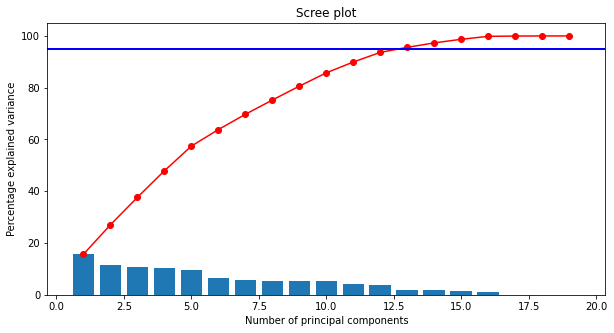

In [16]:
num_components = 19
pca_all = decomposition.PCA(n_components=num_components, random_state=42)
pca_all.fit(X_scaled)

display_scree_plot(pca_all) 

# 5

In [17]:
print(pca_all.explained_variance_ratio_.cumsum().round(2))

[0.16 0.27 0.38 0.48 0.57 0.64 0.7  0.75 0.81 0.86 0.9  0.94 0.96 0.97
 0.99 1.   1.   1.   1.  ]


In [18]:
# nous sélectionnons le nombre de composants principaux que nous retournerons
num_components = 12

pca = decomposition.PCA(n_components=num_components, random_state=42)
pca.fit(X_scaled)

# Transform the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

### Cercle des Correlations

In [19]:
palette = sns.color_palette("bright", 10)

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(8,8))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="darkred", width=.002)
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='left', va='center', rotation=label_rotation, color="green", alpha=0.9)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='darkred')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (PC{} et PC{})".format(d1+1, d2+1))
            plt.show(block=False)

# 7. DBSCAN

In [20]:
from sklearn.cluster import DBSCAN
from sklearn import metrics 
from sklearn.datasets import make_blobs

## 7.1 Evaluation et optimisation

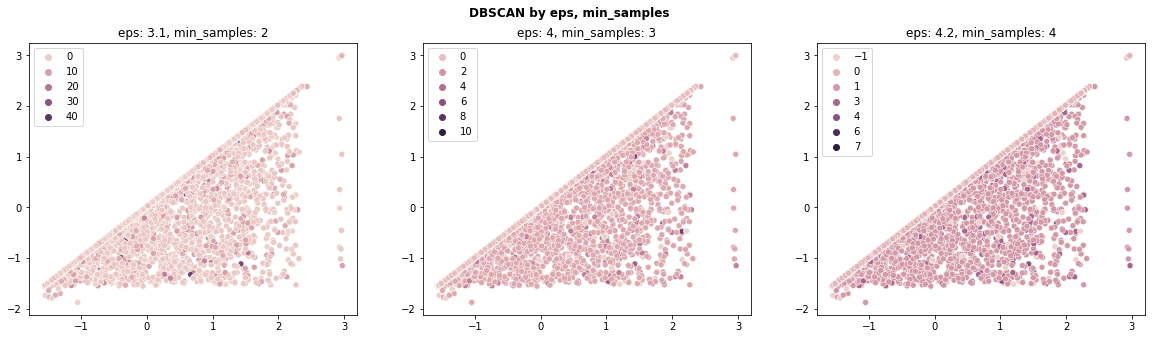

In [21]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))
eps = [3.1, 4, 4.2]
for i in range(3):
    dbscan = DBSCAN(eps=eps[i], min_samples=3+i)
    pred = dbscan.fit_predict(X_scaled)
    sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1], hue=pred, ax=ax[i])
    ax[i].set_title(f'eps: {eps[i]}, min_samples: {2 + i}')
f.suptitle('DBSCAN by eps, min_samples', weight='bold')
plt.show()

## 7.2 Exécution de l'algorithme pour les meilleurs hyperparamètres

In [22]:
epsilon = 4
minimumSamples = 7
dbscan = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X_scaled)

labels = dbscan.labels_

In [23]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5}

In [24]:
from sklearn.neighbors import NearestNeighbors

In [25]:
# reference : http://www.sefidian.com/2020/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

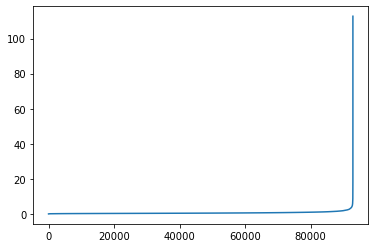

In [26]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [27]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(n_clusters_)
print(n_noise_)

6
540


In [28]:
# Add the cluster number to the original scaled data

X_clustered = pd.DataFrame(X_scaled, index=data.index, columns=data.columns)
X_clustered["labels"] = labels

In [29]:
X_clustered.sample(5)

,anciennete_du_client,date_derniere_commande,nb_commandes,nb_payements,nb_produit,depense_total,review_score_min,montant_commande_max,montant_produit_max,frais_de_port_moy,delai_livraison_max,delai_estime,volume_produit_max,densite_produit_max,distance,boleto,credit_card,debit_card,voucher,labels
customer_unique_id,,,,,,,,,,,,,,,,,,,,
e8a195f60d266e458b02b0e57e85815d,1.287052,1.309979,-0.164174,-0.283584,-0.219007,-0.246039,0.669008,-0.483729,-0.445136,-0.519861,-0.123499,0.365777,-0.589796,0.074455,-0.877437,2.008981,-1.799385,-0.126040,-0.189751,0
390abc8b5c44f2fb1710830750c6c4fc,-1.200097,-1.185978,-0.164174,-0.283584,-0.219007,-0.178197,0.669008,-0.283647,-0.253259,-0.074662,-0.123499,-0.321233,0.252636,-0.241473,-0.141561,-0.499832,-1.799385,8.001645,-0.189751,2
71209693238a35ddbddabefabd4b3d92,0.947598,0.969323,-0.164174,-0.283584,-0.219007,0.000659,-0.860735,0.243842,0.353488,-0.138262,-0.746674,-0.419377,-0.116626,-0.076641,-0.493502,-0.499832,0.575253,-0.126040,-0.189751,0
2eed64615438b22b4e34320f84869d15,-0.697445,-0.681546,-0.164174,-0.283584,-0.219007,-0.128857,-0.095863,-0.138133,-0.082125,-0.074662,0.188088,-0.910099,-0.428560,0.568951,0.461284,-0.499832,0.575253,-0.126040,-0.189751,0
592d5d086e0de4ea2530499b9e40bb38,-0.207849,-0.190216,-0.164174,-0.283584,-0.219007,-0.213660,0.669008,-0.388235,-0.351791,-0.329061,0.188088,-0.811955,-0.594812,0.349175,-0.417725,-0.499832,0.575253,-0.126040,-0.189751,0


# 8. Visualisation et interprétation des clusters

### Individuals Factor Map

In [73]:
def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''

    return (colour[0], colour[1], colour[2], alpha)


def append_class(df, class_name, feature, thresholds, names):
    '''Append a new class feature named 'class_name' based on a threshold split of 'feature'.  Threshold values are in 'thresholds' and class names are in 'names'.'''

    n = pd.cut(df[feature], bins=thresholds, labels=names)
    df[class_name] = n


def display_factorial_planes(X_projected,
                             n_comp,
                             pca,
                             axis_ranks,
                             labels=None,
                             alpha=1,
                             illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig = plt.figure(figsize=(7, 6))

            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2],
                            alpha=alpha,
                           s=20)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1],
                                X_projected[selected, d2],
                                alpha=alpha, s=20,
                                label=value,
                               )
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x,
                             y,
                             labels[i],
                             fontsize='14',
                             ha='center',
                             va='center')

            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-10, 20])
            plt.ylim([-10, 20])

            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(
                d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('PC{} ({}%)'.format(
                d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)))

            plt.title("Projection of points (on PC{} and PC{})".format(
                d1 + 1, d2 + 1))
            #plt.show(block=False)

In [74]:
# Take a copy of the data an add a new column for the banding
#classed_data = data.copy()
#append_class(classed_data, 'rank_band','review_score_min',[0,1,2,3,4,5],['1','2','3','4','5'])

# Get a list of the new bandings that we can pass to the plot
#classed_data = classed_data.reset_index()
#rank_band = [classed_data.loc[uni_id, "rank_band"] for uni_id in range(0,len(X_scaled))]

### Box plots

In [34]:
# Convert non-scaled X to a data frame
X_reduceddf = pd.DataFrame(data, index=data.index, columns=data.columns)
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,anciennete_du_client,date_derniere_commande,nb_commandes,nb_payements,nb_produit,depense_total,review_score_min,montant_commande_max,montant_produit_max,frais_de_port_moy,delai_livraison_max,delai_estime,volume_produit_max,densite_produit_max,distance,boleto,credit_card,debit_card,voucher,cluster
customer_unique_id,,,,,,,,,,,,,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,519,519,1,1,1,147,4,147,125,22,8,-11,107136,8,349,0,100,0,0,1
290c77bc529b7ac935b93aa66c333dc3,277,277,1,1,1,335,5,335,289,46,16,-8,53400,19,414,0,100,0,0,3
060e732b5b29e8181a18229c7b0b2b5e,151,151,1,1,1,158,5,158,140,18,26,1,45968,18,30,0,100,0,0,3
259dac757896d24d7702b9acbbff3f3c,218,218,1,1,1,173,5,173,150,23,14,-13,79968,15,19,0,100,0,0,3
345ecd01c38d18a9036ed96c73b8d066,80,80,1,1,1,252,5,252,230,22,11,-6,23625,22,220,0,100,0,0,3


In [81]:
X_clustered.head()

,anciennete_du_client,date_derniere_commande,nb_commandes,nb_payements,nb_produit,depense_total,review_score_min,montant_commande_max,montant_produit_max,frais_de_port_moy,delai_livraison_max,delai_estime,volume_produit_max,densite_produit_max,distance,boleto,credit_card,debit_card,voucher,labels
customer_unique_id,,,,,,,,,,,,,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,1.502474,1.526164,-0.164174,-0.283584,-0.219007,-0.102646,-0.095863,-0.060828,-0.014709,0.116138,-0.435087,0.071344,3.859939,-0.159057,-0.426145,-0.499832,0.575253,-0.12604,-0.189751,0
290c77bc529b7ac935b93aa66c333dc3,-0.077290,-0.059194,-0.164174,-0.283584,-0.219007,0.187225,0.669008,0.794067,0.835774,1.642535,0.395813,0.365777,1.594794,-0.007961,-0.316690,-0.499832,0.575253,-0.12604,-0.189751,1
060e732b5b29e8181a18229c7b0b2b5e,-0.899811,-0.884629,-0.164174,-0.283584,-0.219007,-0.085685,0.669008,-0.010808,0.063079,-0.138262,1.434438,1.249077,1.281511,-0.021697,-0.963317,-0.499832,0.575253,-0.12604,-0.189751,1
259dac757896d24d7702b9acbbff3f3c,-0.462439,-0.445707,-0.164174,-0.283584,-0.219007,-0.062557,0.669008,0.057402,0.114938,0.179738,0.188088,-0.124944,2.714720,-0.062905,-0.981840,-0.499832,0.575253,-0.12604,-0.189751,1
345ecd01c38d18a9036ed96c73b8d066,-1.363295,-1.349755,-0.164174,-0.283584,-0.219007,0.059250,0.669008,0.416640,0.529808,0.116138,-0.123499,0.562066,0.339682,0.033247,-0.643371,-0.499832,0.575253,-0.12604,-0.189751,1


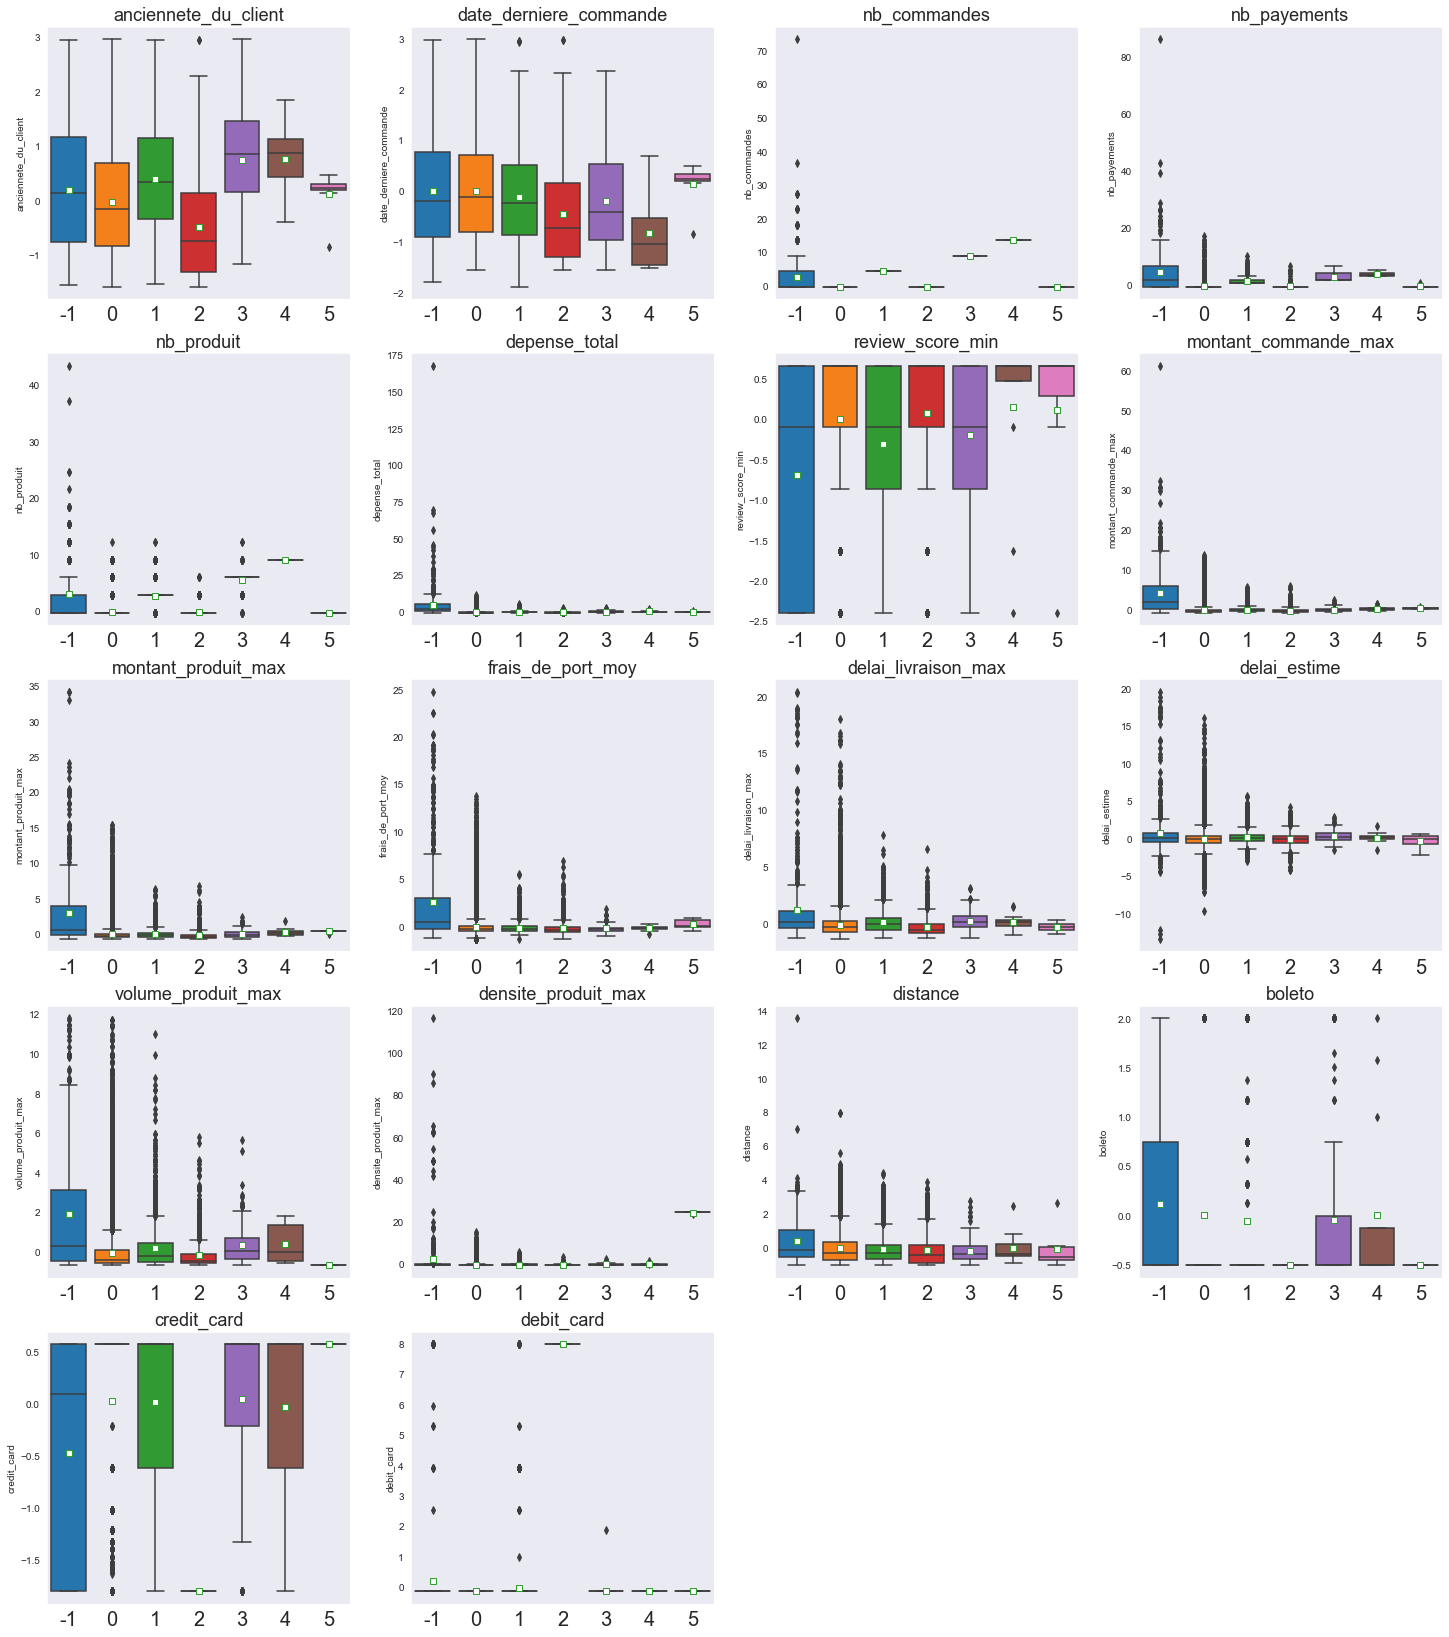

In [33]:
sns.color_palette("Set2")
sns.set_style("dark")

# cols = ['anciennete_du_client', 'nb_payements', 'nb_commandes']
cols = data.columns

fig = plt.figure(figsize=(25,12))

start = 0

for i in range(len(cols)-1):
    fig.subplots_adjust(top=1.95, wspace=.2)
    fig.add_subplot(5, 4, i+1)
    column = cols[i]
    ax = sns.boxplot(x = X_clustered['labels'],
                     y = X_clustered[column],
                     data=X_clustered,
                     saturation=0.9,
                     #order=["0", "1", "2", "3", "4"],
                     showmeans=True,
                     meanprops={"marker":"s","markerfacecolor":"white"},
                     #color='darkred'
                    )
    ax.set(xlabel=None)
    # ax.set(ylabel=None)
    ax.set_title("{}".format(column), fontsize=18)
    for tick in ax.get_xticklabels():
        tick.set_size(20)
    for tick in ax.get_yticklabels():
        tick.set_size(10)
    start = start + 1

#sns.boxplot
    
#plt.title('Boxplot des clusters par les variables', fontdict=font)
    
plt.show()

### Heat map

In [30]:
x = X_clustered.groupby('labels').mean()

In [31]:
std_scale = preprocessing.StandardScaler().fit(x)
x_scaled = std_scale.transform(x)

#minmax_scale = preprocessing.MinMaxScaler().fit(x)
#x_minmax_scaled = minmax_scale.transform(x)

<AxesSubplot:>

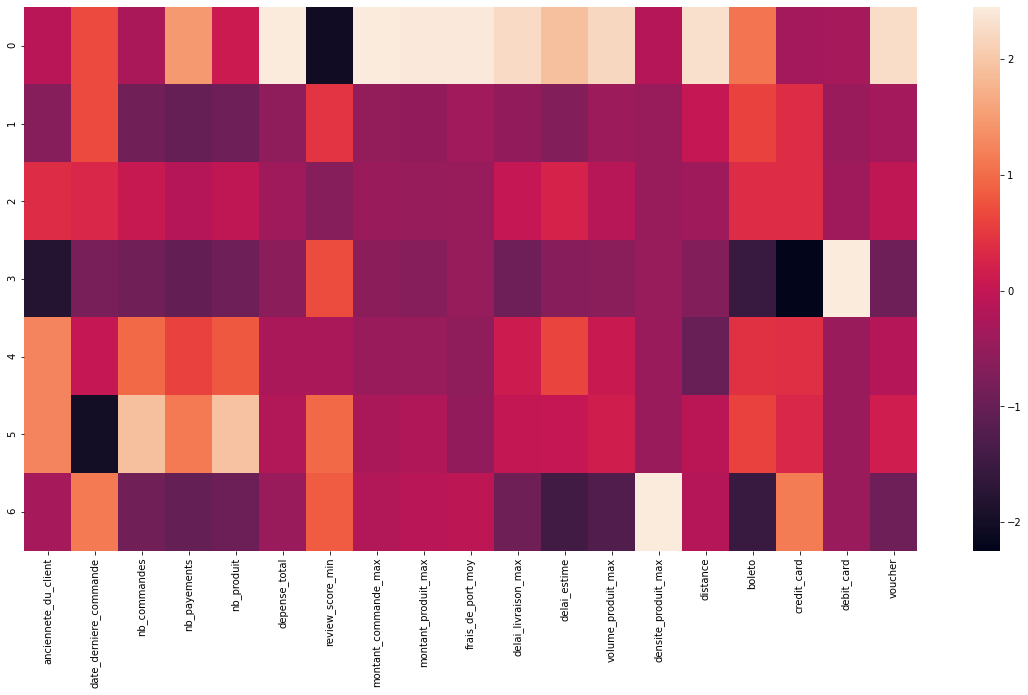

In [32]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(pd.DataFrame(x_scaled, columns=x.columns))